<a href="https://colab.research.google.com/github/girilang/COMP9414-Tutorials/blob/main/Tutorial_Week_4_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Intelligence - COMP9414 23T2
###Tutorial week 4 - Neural networks

Backpropagation step-by-step

@Author: __Francisco Cruz__


##Theoretical Background

A feedforward network, with $n$ inputs, $m$ outputs and a hidden layer with $p$ elements, might be mathematically modelled as:

\begin{equation}
Y(t)=Wo^Tf_{NL}(Wi^TX(t)).
\end{equation}

Error of the network:

\begin{equation}
E(t)=Y(t)-T(t),
\end{equation}

with $T(t)$: targets.

The backpropagation algorithm allows iteratively updating the weights of the network, backpropagating the mean squared error, i.e.:

\begin{equation}
mse=\frac{1}{s}\sum_{k=1}^{m} \sum_{t=1}^{s} e_k^2(t),
\end{equation}

with $s$: total number of samples and $e_k$: k-th component of the vector $E(t)$.

This value ($mse$) is the objective function to minimise. Then, the gradient is computed respect to each of the network parameters, obtaining:

\begin{equation}
\Delta Wo=-\alpha*\frac{2}{s}*E(t)*Z^T(t),
\end{equation}

\begin{equation}
\Delta Wi^T=-\alpha*\frac{2}{s}*E^T(t)*Wo_j*\frac{\partial f_{NL}}{\partial Zin}*X^T(t),
\end{equation}

with $\alpha$: learning rate.


__Section 2.a.__ Using Python, create a feed-forward neural network with one hidden layer (one unit in each layer).


In [1]:
#Section 2.a. We use numpy arrays to represent the network
import numpy as np
import matplotlib.pyplot as plt

__Section 2.b.__ Input and target vectors:

$Input=[-2 \quad -1 \quad 0 \quad 1; \quad -1 \quad 0 \quad 1 \quad 2]$.

$Target=[-1.5 \quad -1 \quad 1 \quad 1.5]$


In [2]:
#Section 2.b. Inputs and targets
x = np.array([[-2,-1,0,1],[-1,0,1,2]]) #inputs
t = np.array([-1.5,-1,1,1.5]) #targets

__Section 2.c.__ Initialise the network parameters (weights) as follows:
$wi_1=0.0651$, $wi_2=-0.6970$, $wo=-0.1342$, $bi=0$, $bo=-0.5481$.


In [3]:
#Section 2.c. Initial weight values
wi1=0.0651
wi2=-0.6970
wo=-0.1342
bi=0
bo=-0.5481
#Section 3.f. Vary the previous values to test the influence in the BP algorithm

__Section 2.d.__ Compute the delta values for each of the network parameters. As a non-linear function, use the hyperbolic tangent:

\begin{equation}
f_{NL}(x)=\frac{2}{1+e^{-2x}}-1
\end{equation}


In [4]:
#This will be done together with the network training

__Section 2.e.__ To train the network, use a learning rate $\alpha=0.01$ during $500$ epochs.

In [5]:
#Section 2.e. Epoch and learning rate
q=500 #training epochs
alfa=0.01 #learning rate
#Section 3.e. Vary the previous values to test the influence in the BP algorithm

__Section 3.a.__ Plot the input and target vectors. Show both variables in the same figure.


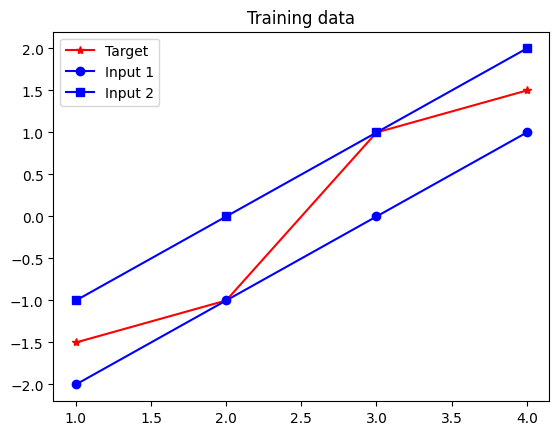

In [6]:
#Section 3.a. Plotting input and target vector together
i=np.arange(1,5)
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,x[0],'bo-',label='Input 1')
plt.plot(i,x[1],'bs-',label='Input 2')
plt.title('Training data')
plt.legend()
plt.show()

__Section 3.b.__ Propagate the input through the network to obtain the output $Y(t)$. Plot the network output and the target vector in the same figure to compare them.


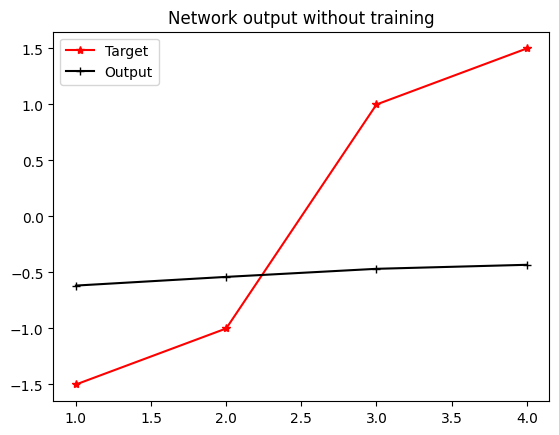

In [7]:
s=4 #number of samples or training examples
zini=np.zeros(s)
zi=np.zeros(s)
yi=np.zeros(s) #output without training


#Section 3.b. Propagating inputs to the output without training
for k in range(s):
    zini[k]=wi1*x[0,k]+wi2*x[1,k]+bi
    zi[k]= (2/(1+np.exp(-2*zini[k])))-1
    yi[k]=wo*zi[k]+bo

#Section 3.b. Plotting network output without training
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,yi,'k+-',label='Output')
plt.title('Network output without training')
plt.legend()
plt.show()


__Section 3.c.__ Train the network. Once the network has been trained, plot the mean squared error for each epoch. Use a semi-logarithmic scale at the y-axis.


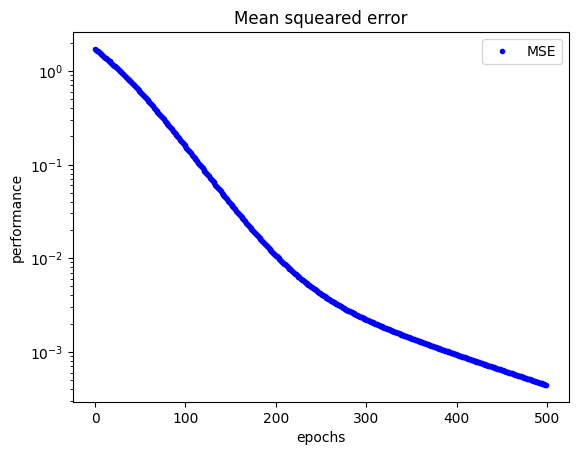

In [8]:
ecm=np.zeros(q)
e=np.zeros(q)
#Training algorithm
for ep in range(q):
    dEdbo=dEdwo=dEdbi=dEdwi1=dEdwi2=0
    zin=np.zeros(s)
    z=np.zeros(s)
    y=np.zeros(s)
    for k in range(s):
        zin[k]=wi1*x[0,k]+wi2*x[1,k]+bi
        z[k]= (2.0/(1+np.exp(-2*zin[k])))-1
        y[k]=wo*z[k]+bo #output of the network
        e[k]=y[k]-t[k] #computing the error
        ecm[ep]=ecm[ep]+(1.0/s)*np.power(e[k],2) #computing the mean squared error

        #Section 2.d. Computing delta values
        #Computing delta values (gradients) for the output layer, Eq. 4
        dEdbo=dEdbo+alfa*(2.0/s)*e[k]
        dEdwo=dEdwo+alfa*(2.0/s)*e[k]*z[k]
        #Computing delta values (gradients) for the hidden layer (using the derivative of the non-linear function), Eq. 5
        dEdbi=dEdbi+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/np.power(1+np.exp(-2*zin[k]),2))
        dEdwi1=dEdwi1+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/(np.power(1+np.exp(-2*zin[k]),2)))*x[0,k]
        dEdwi2=dEdwi2+alfa*(2.0/s)*e[k]*wo*(4*np.exp(-2*zin[k])/(np.power(1+np.exp(-2*zin[k]),2)))*x[1,k];

    #Updating network parameters
    wi1=wi1-dEdwi1
    wi2=wi2-dEdwi2
    bi=bi-dEdbi
    wo=wo-dEdwo
    bo=bo-dEdbo

#Section 3.c. Plotting the mean squared error
plt.semilogy(range(q),ecm,'b.', label='MSE')
plt.title('Mean squeared error')
plt.xlabel('epochs')
plt.ylabel('performance')
plt.legend()
plt.show()


__Section 3.d.__ Once again plot the outputs and the target vector using the network trained instead to compare the results.


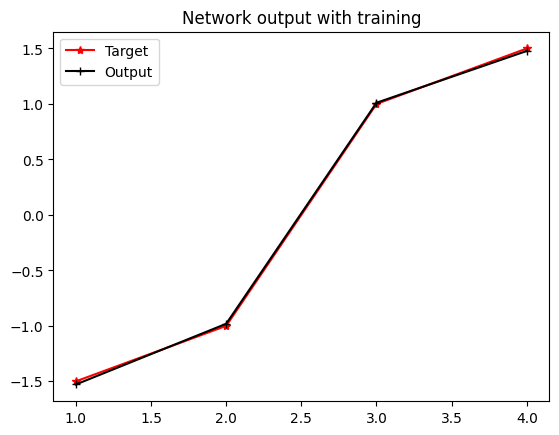

In [9]:
#Section 3.d.
plt.plot(i,t,'r*-',label='Target')
plt.plot(i,y,'k+-',label='Output')
plt.title('Network output with training')
plt.legend()
plt.show()